In [7]:
import pandas as pd


In [8]:
import numpy as np

In [9]:
import matplotlib.pyplot as plt

In [10]:
import seaborn as sns

In [11]:
from google.colab import files

In [12]:
uploaded = files.upload()

Saving Project Management Dataset.csv to Project Management Dataset.csv


In [13]:
df=pd.read_csv('Project Management Dataset.csv')

In [14]:
print(df.head())

                Project Name  \
0                 Rhinestone   
1     A Triumph Of Softwares   
2              The Blue Bird   
3  Remembering Our Ancestors   
4                   Skyhawks   

                                 Project Description  \
0  Associations Now Is A Casual Game To Teach You...   
1  Is A Fully Managed Content Marketing Software ...   
2  Most Content Marketers Know The Golden Rule: Y...   
3  Utilize And Utilizes (Verb Form) The Open, Inc...   
4  Is A Solution For Founders Who Want To Win At ...   

                  Project Type  Project Manager Region           Department  \
0            INCOME GENERATION      Yael Wilcox  North           Admin & BI   
1            INCOME GENERATION  Brenda Chandler   West            eCommerce   
2            INCOME GENERATION    Nyasia Hunter  North            Warehouse   
3          PROCESS IMPROVEMENT  Brenda Chandler   East  Sales and Marketing   
4  WORKING CAPITAL IMPROVEMENT  Jaylyn Mckenzie   East            eCommerce

In [15]:
print(df.dtypes)

Project Name           object
Project Description    object
Project Type           object
Project Manager        object
Region                 object
Department             object
 Project Cost          object
 Project Benefit       object
Complexity             object
Status                 object
Completion%            object
Phase                  object
Year                    int64
Month                   int64
Start Date             object
End Date               object
dtype: object


In [16]:
print(df.isnull().sum())

Project Name           0
Project Description    0
Project Type           0
Project Manager        0
Region                 0
Department             0
 Project Cost          0
 Project Benefit       0
Complexity             0
Status                 0
Completion%            0
Phase                  0
Year                   0
Month                  0
Start Date             0
End Date               0
dtype: int64


In [17]:
print(df.describe())

              Year      Month
count    99.000000  99.000000
mean   2022.747475   7.151515
std       1.402210   3.211471
min    2021.000000   1.000000
25%    2022.000000   4.500000
50%    2022.000000   7.000000
75%    2024.000000  10.000000
max    2025.000000  12.000000


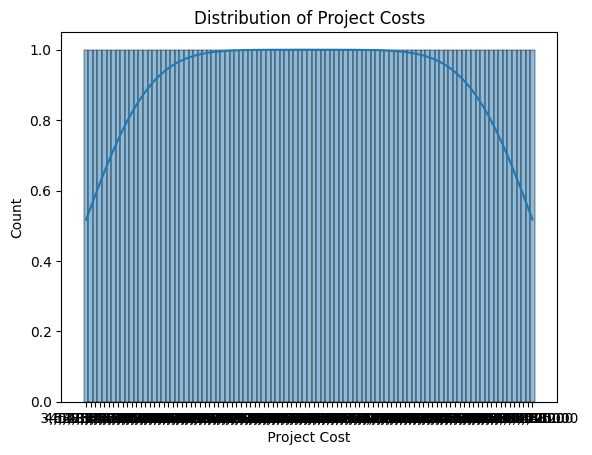

In [18]:
sns.histplot(data=df, x=' Project Cost ', kde=True)
plt.title('Distribution of Project Costs')
plt.show()

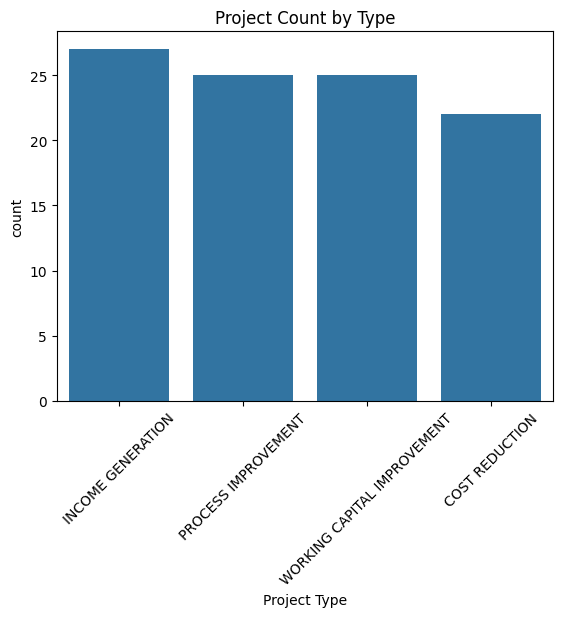

In [19]:
sns.countplot(data=df, x='Project Type')
plt.xticks(rotation=45)
plt.title('Project Count by Type')
plt.show()

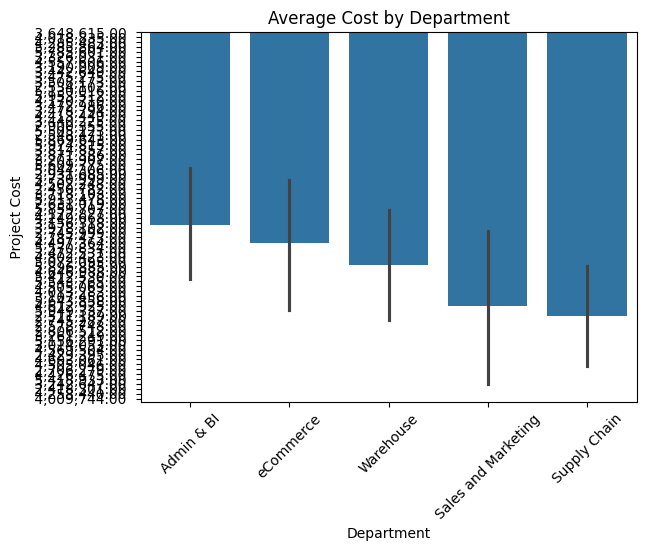

In [20]:
sns.barplot(data=df, x='Department', y=' Project Cost ', estimator=np.mean)
plt.xticks(rotation=45)
plt.title ('Average Cost by Department')
plt.show()

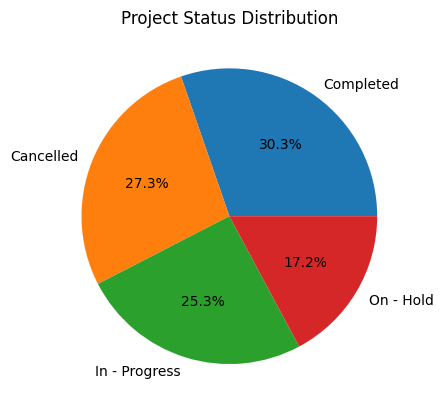

In [21]:
plt.pie(df['Status'].value_counts(), labels=df['Status'].value_counts().index, autopct='%1.1f%%')
plt.title('Project Status Distribution')
plt.show()

In [22]:
corr=df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: 'Rhinestone'

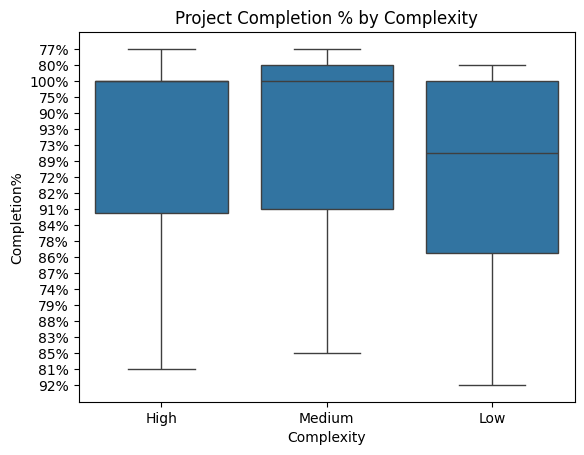

In [23]:
sns.boxplot(data=df, x='Complexity', y='Completion%', showfliers=False)
plt.title('Project Completion % by Complexity')
plt.show()

In [24]:
df['Year-Month']= df['Year'].astype(str) + '-' + df['Month'].astype(str)
df.groupby('Year-Month')[' Project Cost '].sum().plot()
plt.title('Monthly Project Costs Over Time')
plt.xticks(rotation=45)
plt.show()

TypeError: no numeric data to plot

In [25]:
df[' Project Cost '] = df[' Project Cost '].str.replace(',', '').astype(float)

In [33]:
df[' Project Benefit '] = df[' Project Benefit '].str.replace(',', '').astype(float)

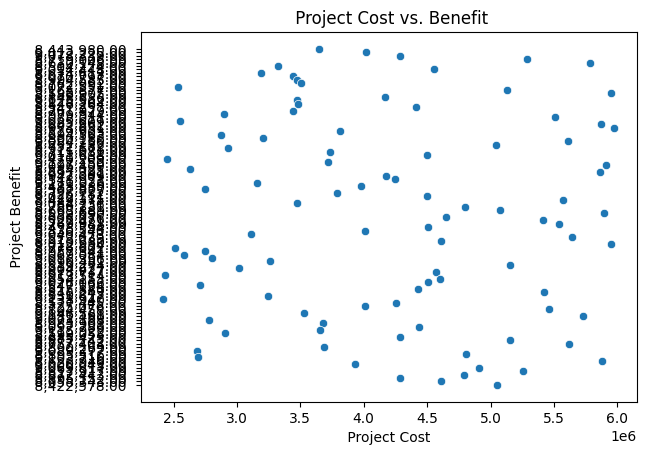

In [26]:
sns.scatterplot(data=df, x=' Project Cost ', y=' Project Benefit ')
plt.title(' Project Cost vs. Benefit')
plt.show()

In [27]:
df.columns

Index(['Project Name', 'Project Description', 'Project Type',
       'Project Manager', 'Region', 'Department', ' Project Cost ',
       ' Project Benefit ', 'Complexity', 'Status', 'Completion%', 'Phase',
       'Year', 'Month', 'Start Date', 'End Date', 'Year-Month'],
      dtype='object')

In [28]:
import plotly.express as px

fig = px.scatter_3d(df, x=' Project Cost ', y=' Project Benefit ', z='Complexity',
                  color='Project Type')
fig.update_layout(scene = dict(
                    xaxis = dict(title  = 'Project Cost'),
                    yaxis = dict(title  = 'Project Benefit'),
                    zaxis = dict(title  = 'Complexity')))
fig.show()


In [29]:
# prompt: generate  label encoder for complexity

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder to the Complexity column
df['Complexity'] = le.fit_transform(df['Complexity'])

# Print the encoded labels
print(le.classes_)

['High' 'Low' 'Medium']


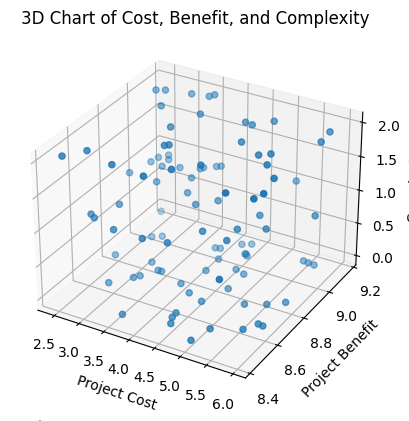

In [34]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[' Project Cost '], df[' Project Benefit '], df['Complexity'])
ax.set_xlabel('Project Cost')
ax.set_ylabel('Project Benefit')
ax.set_zlabel('Complexity')
plt.title('3D Chart of Cost, Benefit, and Complexity')
plt.show()